## Importing Necessary Libraries

In [ ]:
!pip install "gensim==4.2.0"
!pip install "texthero==1.0.5"
!pip install unidecode
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import pandas as pd
import texthero as th
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the Firefox Dataset

In [ ]:
df = pd.read_csv('bugs-2023-02-11 thunderbird (2).csv')
df.head()

,Bug ID,Type,Priority,Assignee,Severity,Status,Opened,Closed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,35689,defect,P3,jporterbugs,minor,RESOLVED,12-04-2000 17:25,17-09-2009 23:34,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445
1,36489,enhancement,--,neil,normal,RESOLVED,20-04-2000 01:50,24-03-2015 17:00,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451
2,58140,enhancement,--,mkmelin+mozilla,normal,RESOLVED,26-10-2000 15:57,29-11-2009 19:32,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321
3,67219,defect,--,mkmelin+mozilla,trivial,RESOLVED,31-01-2001 13:03,01-08-2009 09:28,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104
4,68784,enhancement,--,acelists,normal,RESOLVED,14-02-2001 01:22,16-04-2013 02:06,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444


In [ ]:
import pandas as pd

data = pd.read_csv('bugs-2023-02-11 thunderbird (2).csv')

### Data Cleaning - Checking for Missing Values

In [ ]:
# Data Cleaning (if necessary)
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
Bug ID          0
Type            0
Priority        0
Assignee        0
Severity       22
Status          0
Opened          0
Closed          0
Resolution      0
Summary         0
Opened_Date     0
Closed_Date     0
Days_Taken      0
dtype: int64


### Trend Analysis

In [ ]:
# Trend Analysis (if applicable)
# Example: Number of bugs opened each year
data['Opened_Date'] = pd.to_datetime(data['Opened_Date'], format='%d-%m-%Y')  # Adjust the date parsing format
data['Year'] = data['Opened_Date'].dt.year
bugs_per_year = data.groupby('Year').size()
print("\nNumber of bugs opened each year:")
print(bugs_per_year)



Number of bugs opened each year:
Year
2000       3
2001       7
2002       8
2003     206
2004     472
2005     424
2006     397
2007     326
2008     559
2009     897
2010     465
2011     500
2012     700
2013     346
2014     369
2015     371
2016     426
2017     645
2018     884
2019    1084
2020     911
dtype: int64


Assignee Performance

In [ ]:
# Assignee Performance (if applicable)
# Example: Average days taken to resolve bugs by each assignee
assignee_performance = data.groupby('Assignee')['Days_Taken'].mean()
print("\nAssignee performance (average days taken to resolve bugs):")
print(assignee_performance)



Assignee performance (average days taken to resolve bugs):
Assignee
 +                    2332.0
D.O.Teller+bugspam       1.0
DomDenham              963.5
Jim                     74.0
LpSolit                820.0
                       ...  
zach.x.nickell         905.0
zcrendel              1976.0
zeniko                  64.0
zeyufly                162.0
zibi                    68.6
Name: Days_Taken, Length: 427, dtype: float64


## Dropping the Un-Necessary Columns

In [ ]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Closed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444


## Getting the information of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       10000 non-null  int64 
 1   Type         10000 non-null  object
 2   Assignee     10000 non-null  object
 3   Severity     9978 non-null   object
 4   Status       10000 non-null  object
 5   Resolution   10000 non-null  object
 6   Summary      10000 non-null  object
 7   Opened_Date  10000 non-null  object
 8   Closed_Date  10000 non-null  object
 9   Days_Taken   10000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 781.4+ KB


## Applying Preprocessing Techniques on Summary Column

In [ ]:
df['Summary']

0       Newsgroup postings don't linkify newsgroup hea...
1       Combined To/From column in thread pane (aka "C...
2       save multiple messages as individual files in ...
3       Disable filters menu item when no accounts are...
4       when sending mail, should first check "no reci...
                              ...                        
9995    When two or more messages are selected/highlig...
9996    cloudfile.onFileUpload contains wrong fileName...
9997    remove incoming mail default text encoding option
9998                  Remove preprocessing in panelUI.css
9999    this._addressBooks could be used while undefin...
Name: Summary, Length: 10000, dtype: object

### 1. Tokenization

In [ ]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [ ]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445,"[Newsgroup, postings, do, linkify, newsgroup, ..."
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451,"[Combined, column, in, thread, pane, aka, Corr..."
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321,"[save, multiple, messages, as, individual, fil..."
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104,"[Disable, filters, menu, item, when, no, accou..."
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444,"[when, sending, mail, should, first, check, no..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,1671800,defect,richard.marti,--,RESOLVED,FIXED,When two or more messages are selected/highlig...,17-10-2020,21-10-2020,4,"[When, two, or, more, messages, are, in, the, ..."
9996,1671835,defect,je,--,RESOLVED,FIXED,cloudfile.onFileUpload contains wrong fileName...,18-10-2020,08-06-2021,233,"[contains, wrong, fileName, if, attachment, wa..."
9997,1671880,task,remotenonsense,--,RESOLVED,FIXED,remove incoming mail default text encoding option,19-10-2020,19-11-2020,31,"[remove, incoming, mail, default, text, encodi..."
9998,1671974,task,richard.marti,--,RESOLVED,FIXED,Remove preprocessing in panelUI.css,19-10-2020,19-10-2020,0,"[Remove, preprocessing, in]"


### 2. Converting the Summary into Lowercase

In [ ]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0       newsgroup postings do linkify newsgroup header...
1       combined column in thread pane aka corresponde...
2       save multiple messages as individual files in ...
3       disable filters menu item when no accounts are...
4       when sending mail should first check no recipi...
                              ...                        
9995    when two or more messages are in the message p...
9996    contains wrong filename if attachment was rena...
9997    remove incoming mail default text encoding option
9998                              remove preprocessing in
9999                     could be used while undefined in
Name: String_Tokenized, Length: 10000, dtype: object

### 3. Removing the Stopwords from the Summary

In [ ]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0        newsgroup postings linkify newsgroup header like
1       combined column thread pane aka correspondents...
2       save multiple messages individual files directory
3                  disable filters menu item accounts set
4       sending mail first check recipient subject cur...
                              ...                        
9995    two messages message pane one messages highlig...
9996    contains wrong filename attachment renamed for...
9997    remove incoming mail default text encoding option
9998                                 remove preprocessing
9999                                 could used undefined
Name: String_Tokenized, Length: 10000, dtype: object

### 4. Removing the Punctuations

In [ ]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445,"[Newsgroup, postings, do, linkify, newsgroup, ...",newsgroup postings linkify newsgroup header like,newsgroup postings linkify newsgroup header like
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451,"[Combined, column, in, thread, pane, aka, Corr...",combined column thread pane aka correspondents...,combined column thread pane aka correspondents...
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321,"[save, multiple, messages, as, individual, fil...",save multiple messages individual files directory,save multiple messages individual files directory
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104,"[Disable, filters, menu, item, when, no, accou...",disable filters menu item accounts set,disable filters menu item accounts set
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444,"[when, sending, mail, should, first, check, no...",sending mail first check recipient subject cur...,sending mail first check recipient subject cur...


### 5. Removing ' " ' with blank space ' '

In [ ]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0        newsgroup postings linkify newsgroup header like
1       combined column thread pane aka correspondents...
2       save multiple messages individual files directory
3                  disable filters menu item accounts set
4       sending mail first check recipient subject cur...
                              ...                        
9995    two messages message pane one messages highlig...
9996    contains wrong filename attachment renamed for...
9997    remove incoming mail default text encoding option
9998                                 remove preprocessing
9999                                 could used undefined
Name: Summary_wo_Punctuation, Length: 10000, dtype: object

### 6. Stemming the Summary Column

In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x])

### 7. Converting the Stemmed column into string type

In [ ]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445,"[Newsgroup, postings, do, linkify, newsgroup, ...",newsgroup postings linkify newsgroup header like,"[newsgroup, postings, linkify, newsgroup, head...","[newsgroup, post, linkifi, newsgroup, header, ...",newsgroup post linkifi newsgroup header like
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451,"[Combined, column, in, thread, pane, aka, Corr...",combined column thread pane aka correspondents...,"[combined, column, thread, pane, aka, correspo...","[combin, column, thread, pane, aka, correspond...",combin column thread pane aka correspond column
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321,"[save, multiple, messages, as, individual, fil...",save multiple messages individual files directory,"[save, multiple, messages, individual, files, ...","[save, multipl, messag, individu, file, direct...",save multipl messag individu file directori
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104,"[Disable, filters, menu, item, when, no, accou...",disable filters menu item accounts set,"[disable, filters, menu, item, accounts, set]","[disabl, filter, menu, item, account, set]",disabl filter menu item account set
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444,"[when, sending, mail, should, first, check, no...",sending mail first check recipient subject cur...,"[sending, mail, first, check, recipient, subje...","[send, mail, first, check, recipi, subject, cu...",send mail first check recipi subject current w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1671800,defect,richard.marti,--,RESOLVED,FIXED,When two or more messages are selected/highlig...,17-10-2020,21-10-2020,4,"[When, two, or, more, messages, are, in, the, ...",two messages message pane one messages highlig...,"[two, messages, message, pane, one, messages, ...","[two, messag, messag, pane, one, messag, highl...",two messag messag pane one messag highlight go...
9996,1671835,defect,je,--,RESOLVED,FIXED,cloudfile.onFileUpload contains wrong fileName...,18-10-2020,08-06-2021,233,"[contains, wrong, fileName, if, attachment, wa...",contains wrong filename attachment renamed for...,"[contains, wrong, filename, attachment, rename...","[contain, wrong, filenam, attach, renam, forward]",contain wrong filenam attach renam forward
9997,1671880,task,remotenonsense,--,RESOLVED,FIXED,remove incoming mail default text encoding option,19-10-2020,19-11-2020,31,"[remove, incoming, mail, default, text, encodi...",remove incoming mail default text encoding option,"[remove, incoming, mail, default, text, encodi...","[remov, incom, mail, default, text, encod, opt...",remov incom mail default text encod option
9998,1671974,task,richard.marti,--,RESOLVED,FIXED,Remove preprocessing in panelUI.css,19-10-2020,19-10-2020,0,"[Remove, preprocessing, in]",remove preprocessing,"[remove, preprocessing]","[remov, preprocess]",remov preprocess


### 8. Applying TF-IDF using SkLearn

In [ ]:
data = []
for i in df['ListString']:
    review = ''.join(i)
    data.append(review)
print(data)

['newsgroup post linkifi newsgroup header like', 'combin column thread pane aka correspond column', 'save multipl messag individu file directori', 'disabl filter menu item account set', 'send mail first check recipi subject current way round', 'compact purg button', 'flag messag gray standalon messag window', 'indic root folder new mail subfold', 'card preview pane content ca select copi clipboard', 'open folder show folder name', 'news messag read center list pane', 'crash open address book edit file nsaddrdatabas', 'composit need abil manipul multipl recipi simultan multipl select email address contact delet copi toggl etc', 'remov code mailnew', 'return receipt process messag load', 'allow smtp server specifi creat new account', 'drag drop file mailbox folder', 'sometim delet messag focus get lost instead go next messag', 'abil messag text file folder', 'type letter box trigger menu select', 'need set default mailto protocol handler default mail app', 'remot imag alway load regardle

In [ ]:
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(data)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
ab : 7.032386536628571
abbrevi : 9.517293186416572
abc : 9.517293186416572
abchang : 9.517293186416572
abchangedmonitor : 9.517293186416572
abdirtreeoverlay : 9.517293186416572
abi : 9.517293186416572
abil : 7.502390165874306
abl : 7.3200686090803515
abort : 9.517293186416572
aboutdevtool : 9.517293186416572
aboutdialog : 8.601002454542416
aboutsupport : 9.517293186416572
abpaneloncomposerreopen : 9.517293186416572
abresultstre : 9.517293186416572
abselectaddressesdialog : 9.517293186416572
absent : 9.517293186416572
absolut : 8.824146005856626
acc : 9.517293186416572
acceler : 7.812545094178145
accent : 7.90785527398247
accentcolor : 8.824146005856626
accept : 8.264530217921202
access : 5.556480016818993
accessiblecaret : 9.517293186416572
accesskey : 6.6840798423603545
accid : 9.517293186416572
accident : 8.601002454542416
accnam : 9.517293186416572
accont : 9.517293186416572
accord : 8.264530217921202
account : 4.229026155722035
accountcentr : 9.111828078308406
accountc

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'newsgroup': 2387, 'post': 2934, 'linkifi': 1988, 'header': 1597, 'like': 1979, 'combin': 639, 'column': 637, 'thread': 3865, 'pane': 2800, 'aka': 102, 'correspond': 746, 'save': 3347, 'multipl': 2338, 'messag': 2165, 'individu': 1743, 'file': 1284, 'directori': 940, 'disabl': 943, 'filter': 1298, 'menu': 2153, 'item': 1839, 'account': 31, 'set': 3441, 'send': 3419, 'mail': 2066, 'first': 1316, 'check': 546, 'recipi': 3131, 'subject': 3712, 'current': 804, 'way': 4218, 'round': 3305, 'compact': 652, 'purg': 3044, 'button': 466, 'flag': 1324, 'gray': 1534, 'standalon': 3639, 'window': 4264, 'indic': 1742, 'root': 3301, 'folder': 1347, 'new': 2373, 'subfold': 3711, 'card': 496, 'preview': 2974, 'content': 710, 'ca': 472, 'select': 3408, 'copi': 737, 'clipboard': 597, 'open': 2722, 'show': 3478, 'name': 2348, 'news': 2385, 'read': 3103, 'center': 519, 'list': 1994, 'crash': 766, 'address': 67, 'book': 392, 'edit': 1076, 'nsaddrdatabas': 2435, 'composit': 673, 'need': 2363,

In [ ]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 1979)	0.3174764852739266
  (0, 1597)	0.2502890315467414
  (0, 1988)	0.5018475957064273
  (0, 2934)	0.38598777613745294
  (0, 2387)	0.660095833452727
  (1, 746)	0.4029965537432351
  (1, 102)	0.4029965537432351
  (1, 2800)	0.23264034233383535
  (1, 3865)	0.28329225232483685
  (1, 637)	0.6180636879043399
  (1, 639)	0.39850822316202617
  (2, 940)	0.44809827664277807
  (2, 1284)	0.3077662957780632
  (2, 1743)	0.5761785111187349
  (2, 2165)	0.23855579458765205
  (2, 2338)	0.4202499953509085
  (2, 3347)	0.3728099237601318
  (3, 3441)	0.384619823919562
  (3, 31)	0.3560370889220632
  (3, 1839)	0.46087044274009886
  (3, 2153)	0.3828473604145682
  (3, 1298)	0.428727508417855
  (3, 943)	0.42722855653379377
  (4, 3305)	0.4494320558434231
  (4, 4218)	0.3634858444173263
  :	:
  (9995, 3990)	0.274502694159227
  (9995, 806)	0.3032144829686892
  (9995, 1982)	0.2170791165403027
  (9995, 2272)	0.21044800158257163
  (9995, 1512)	0.2781069103346843
  (9995, 2165)	0.5424833418552324
  (9

In [ ]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
words_set = tfidf.get_feature_names_out()
print(words_set)

['ab' 'abbrevi' 'abc' ... 'zone' 'zoom' 'zune']


In [ ]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)
df_tf_idf

,ab,abbrevi,abc,abchang,abchangedmonitor,abdirtreeoverlay,abi,abil,abl,abort,...,yosemit,youcompletem,yousendit,ysi,zebra,zero,zip,zone,zoom,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tf_idf['Severity'] = df['Severity']

In [ ]:
df2 = df_tf_idf.iloc[0:4000,:]

In [ ]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3997 entries, 0 to 3999
Columns: 4359 entries, ab to Severity
dtypes: float64(4358), object(1)
memory usage: 133.0+ MB


# **SVM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# model training
mdl = SVC()  # Support Vector Classifier
mdl.fit(xtrain, ytrain)

# evaluate the model
num_valid = np.size(xtest, 0)
y_pred = mdl.predict(xtest)
Acc = np.sum(ytest == y_pred) / num_valid
print("Accuracy:", 100 * Acc)

# plot convergence (not applicable for SVM)


Accuracy: 74.66666666666667


# **Logistic Regression**

In [ ]:
df2 = df_tf_idf.iloc[0:1000,:]

In [ ]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Columns: 4359 entries, ab to Severity
dtypes: float64(4358), object(1)
memory usage: 33.2+ MB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame containing the data

# Split data into features (feat) and labels (label)
feat = df2.iloc[:, :-1].values
label = df2.iloc[:, -1].values

# Split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# Model training
mdl = LogisticRegression()  # Logistic Regression Classifier
mdl.fit(xtrain, ytrain)

# Evaluate the model
y_pred = mdl.predict(xtest)
accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy:", accuracy)


Accuracy: 71.66666666666667


# **Random forest**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame containing the data

# Split data into features (feat) and labels (label)
feat = df2.iloc[:, :-1].values
label = df2.iloc[:, -1].values

# Split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# Model training
mdl = RandomForestClassifier()  # Random Forest Classifier
mdl.fit(xtrain, ytrain)

# Evaluate the model
y_pred = mdl.predict(xtest)
accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy:", accuracy)


Accuracy: 73.0


# Decision tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame containing the data

# Split data into features (feat) and labels (label)
feat = df2.iloc[:, :-1].values
label = df2.iloc[:, -1].values

# Split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# Model training
mdl = DecisionTreeClassifier()  # Decision Tree Classifier
mdl.fit(xtrain, ytrain)

# Evaluate the model
y_pred = mdl.predict(xtest)
accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy:", accuracy)


Accuracy: 57.99999999999999


**CNN**

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

   Bug ID         Type Priority         Assignee Severity    Status  \
0   35689       defect       P3      jporterbugs    minor  RESOLVED   
1   36489  enhancement       --             neil   normal  RESOLVED   
2   58140  enhancement       --  mkmelin+mozilla   normal  RESOLVED   
3   67219       defect       --  mkmelin+mozilla  trivial  RESOLVED   
4   68784  enhancement       --         acelists   normal  RESOLVED   

             Opened            Closed Resolution  \
0  12-04-2000 17:25  17-09-2009 23:34      FIXED   
1  20-04-2000 01:50  24-03-2015 17:00      FIXED   
2  26-10-2000 15:57  29-11-2009 19:32      FIXED   
3  31-01-2001 13:03  01-08-2009 09:28      FIXED   
4  14-02-2001 01:22  16-04-2013 02:06      FIXED   

                                             Summary Opened_Date Closed_Date  \
0  Newsgroup postings don't linkify newsgroup hea...  12-04-2000  17-09-2009   
1  Combined To/From column in thread pane (aka "C...  20-04-2000  24-03-2015   
2  save multiple mes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


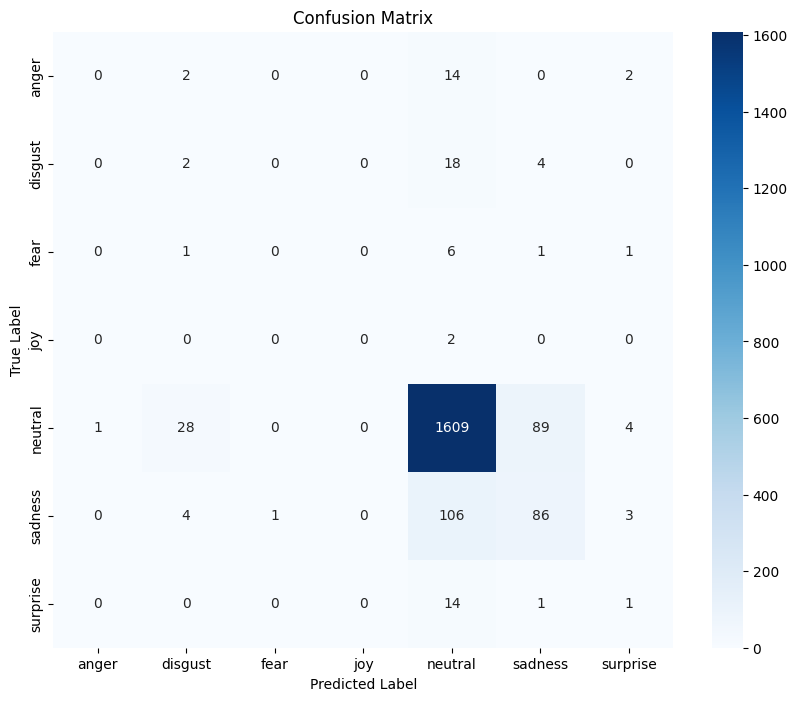

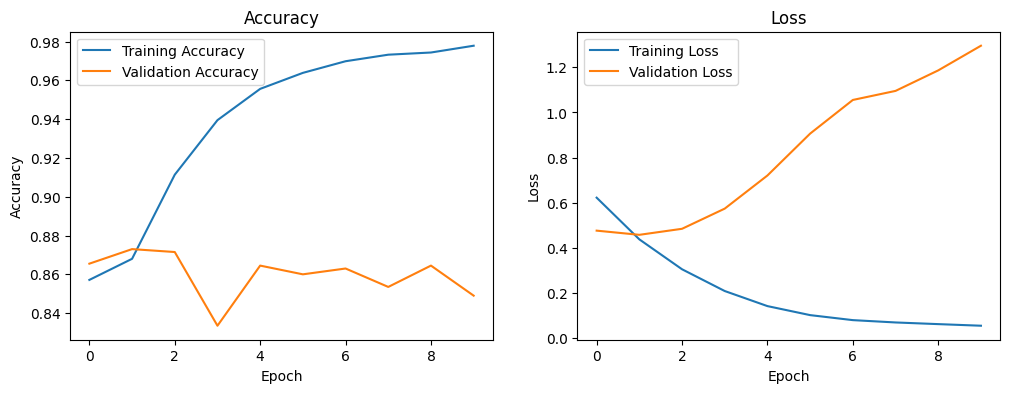

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# Load data
data = pd.read_csv('/content/bugs-2023-02-11 thunderbird (2) (1).csv')

# Initialize emotion detection pipeline
emotion_classifier = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')

# Function to get emotion label for each summary
def get_emotion_label(summary):
    result = emotion_classifier(summary)
    return result[0]['label']

# Apply emotion detection to each summary
data['Emotion'] = data['Summary'].apply(get_emotion_label)
print(data.head())

# Save the labeled data
data.to_csv('labeled_summary_dataset.csv', index=False)

# Preprocess data
def preprocess_data(data, num_words=20000, max_length=100):
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(data['Summary'])
    sequences = tokenizer.texts_to_sequences(data['Summary'])
    word_index = tokenizer.word_index
    print(f'Found {len(word_index)} unique tokens.')

    data_pad = pad_sequences(sequences, maxlen=max_length)
    labels = pd.get_dummies(data['Emotion']).values

    return data_pad, labels, word_index

num_words = 20000  # Adjust vocabulary size here
max_length = 100  # Max length of sequences
data_pad, labels, word_index = preprocess_data(data, num_words, max_length)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data_pad, labels, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))

# Evaluate model
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Predict on validation data
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification report
class_names = pd.get_dummies(data['Emotion']).columns
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)
